In [1]:
import kagglehub
import re
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_path = kagglehub.model_download("google/gemma-2/transformers/gemma-2-2b-it")
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path,device_map="auto")

def predict(description: str) -> str:
    prompt = """Generate SVG code to visually represent the following text description. Please ensure that the generated SVG code is well-formed, valid, and strictly adheres to these constraints. Focus on a clear and concise representation of the input description within the given limitations. Always give the complete SVG code with nothing omitted. Never use an ellipsis.
"""
    formatted_description = f"<description>{description}</description>"
    inputs = tokenizer(prompt + formatted_description, return_tensors="pt")
        
    # Generate the output
    output = model.generate(**inputs, max_new_tokens=900)
    output_decoded = tokenizer.decode(output[0], skip_special_tokens=True)

    # Extract the SVG from the decoded output
    matches = re.findall(r"<svg.*?</svg>", output_decoded, re.DOTALL | re.IGNORECASE) 
    if matches:
        svg = matches[-1].strip()  # Strip any extra spaces or characters
        return svg
    else:
        return "No valid SVG generated."

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
x = predict("a basketball")

The 'batch_size' attribute of HybridCache is deprecated and will be removed in v4.49. Use the more precisely named 'self.max_batch_size' attribute instead.


In [3]:
x

'<svg width="200" height="100" viewBox="0 0 200 100" xmlns="http://www.w3.org/2000/svg">\n  <rect x="20" y="20" width="160" height="80" fill="blue" />\n  <circle cx="100" cy="50" r="20" fill="white" />\n  <circle cx="100" cy="50" r="10" fill="black" />\n</svg>'

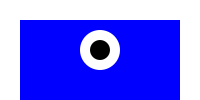

In [4]:
from IPython.display import SVG
display(SVG(x))